In [3]:
#CTobservation study 
#Three data sets: academic_performance, jigsaw_performance, and CT_Performance
#three groups, group A no hints (control group), group B encouraging words, group C hints locating pieces 

# import necessary libraries
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import statsmodels.api as sm

In [4]:
import os 
os.getcwd()

'/Users/shanshanma/Desktop/CTObservation_Python'

In [5]:
df1_Academic = pd.read_csv('/Users/shanshanma/Desktop/CTObservation_Python/Academic_Performance.csv')
df1_Academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    28 non-null     object 
 1   Gender  28 non-null     float64
 2   CN9     27 non-null     float64
 3   MTH9    27 non-null     float64
 4   Eng9    27 non-null     float64
 5   CN10    27 non-null     float64
 6   MTH10   27 non-null     float64
 7   Eng10   27 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.1+ KB


In [108]:
df1_acaclean = df1_Academic.dropna(axis=0, how='any')
df1_acaclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Code    27 non-null     object 
 1   Gender  27 non-null     float64
 2   CN9     27 non-null     float64
 3   MTH9    27 non-null     float64
 4   Eng9    27 non-null     float64
 5   CN10    27 non-null     float64
 6   MTH10   27 non-null     float64
 7   Eng10   27 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.9+ KB


In [16]:
df1_acaclean.describe()

,Gender,CN9,MTH9,Eng9,CN10,MTH10,Eng10
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.851852,59.629630,77.814815,82.129630,75.296296,71.888889,68.759259
std,0.362014,13.411098,13.875926,10.973388,5.545718,18.884942,13.505960
min,1.000000,27.000000,41.000000,63.500000,64.000000,38.000000,52.500000
25%,2.000000,49.000000,68.000000,73.750000,72.500000,59.000000,56.750000
50%,2.000000,59.000000,82.000000,80.000000,76.000000,70.000000,65.000000
75%,2.000000,70.500000,86.000000,89.250000,78.500000,84.500000,78.500000
max,2.000000,88.000000,103.000000,106.500000,87.000000,114.000000,98.000000


In [97]:
df2_Jigsaw = pd.read_csv('/Users/shanshanma/Desktop/CTObservation_Python/Jigsaw_Performance.csv')
df2_Jigsaw.info()
df2_Jigsaw.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 32 non-null     object 
 1   Group                29 non-null     float64
 2   Duration             29 non-null     float64
 3   StrategicOptions     28 non-null     float64
 4   StrategyicOperation  28 non-null     object 
 5   ObservationMode      28 non-null     float64
 6   ObservationStrategy  28 non-null     object 
 7   Complete             28 non-null     float64
 8   Correct              27 non-null     float64
 9   Tipscheck            28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 2.6+ KB


,Code,Group,Duration,StrategicOptions,StrategyicOperation,ObservationMode,ObservationStrategy,Complete,Correct,Tipscheck
0,CNH001,1.0,56.56,1.0,Yes,1.0,Not at all,1.0,1.0,1.0
1,CNH002,1.0,38.58,1.0,Yes,4.0,Frequently,1.0,1.0,1.0
2,CNH004,1.0,49.33,1.0,Yes,4.0,Frequently,1.0,1.0,1.0
3,CNH005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CNH006,2.0,25.62,1.0,Yes,5.0,All the time,1.0,1.0,1.0


In [98]:
df2_jsclean = df2_Jigsaw.dropna(axis=0, how='any')

In [99]:
df2_jsclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 27 non-null     object 
 1   Group                27 non-null     float64
 2   Duration             27 non-null     float64
 3   StrategicOptions     27 non-null     float64
 4   StrategyicOperation  27 non-null     object 
 5   ObservationMode      27 non-null     float64
 6   ObservationStrategy  27 non-null     object 
 7   Complete             27 non-null     float64
 8   Correct              27 non-null     float64
 9   Tipscheck            27 non-null     float64
dtypes: float64(7), object(3)
memory usage: 2.3+ KB


In [73]:
# n of each group 
df2_jsclean_tab = pd.crosstab(index=df2_jsclean["Group"],
                               columns="count")
df2_jsclean_tab

col_0,count
Group,
1.0,7
2.0,9
3.0,11


In [74]:
df2_jsclean.describe()

,Group,Duration,StrategicOptions,ObservationMode,Complete,Correct,Tipscheck
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.148148,41.428889,1.111111,3.333333,1.037037,1.037037,1.074074
std,0.818239,12.490858,0.320256,1.037749,0.192450,0.192450,0.266880
min,1.000000,17.440000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,33.105000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,40.080000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,3.000000,49.335000,1.000000,4.000000,1.000000,1.000000,1.000000
max,3.000000,69.390000,2.000000,5.000000,2.000000,2.000000,2.000000


In [75]:
#filter numeric columns only
numeric_df2_js = df2_jsclean.select_dtypes(include='number')
numeric_df2_js.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 31
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Group             27 non-null     float64
 1   Duration          27 non-null     float64
 2   StrategicOptions  27 non-null     float64
 3   ObservationMode   27 non-null     float64
 4   Complete          27 non-null     float64
 5   Correct           27 non-null     float64
 6   Tipscheck         27 non-null     float64
dtypes: float64(7)
memory usage: 1.7 KB


In [76]:
#check the correlation coefficient and significance among variables in df2 
for col1 in numeric_df2_js.columns:
    for col2 in numeric_df2_js.columns:
        if col1 != col2:
            correlation_coefficient, p_value = stats.pearsonr(numeric_df2_js[col1], numeric_df2_js[col2])
            print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient}")
            print(f"P-value: {p_value}\n")

Correlation coefficient between Group and Duration: 0.03350895217341474
P-value: 0.8682160872332664

Correlation coefficient between Group and StrategicOptions: -0.0652328073053442
P-value: 0.7464945534323221

Correlation coefficient between Group and ObservationMode: -0.060393844167877395
P-value: 0.7647573475166817

Correlation coefficient between Group and Complete: -0.28043104534762664
P-value: 0.15653366289018986

Correlation coefficient between Group and Correct: -0.28043104534762664
P-value: 0.15653366289018986

Correlation coefficient between Group and Tipscheck: 0.12394233388015406
P-value: 0.5379398878551799

Correlation coefficient between Duration and Group: 0.03350895217341474
P-value: 0.8682160872332664

Correlation coefficient between Duration and StrategicOptions: 0.3223175068858073
P-value: 0.1010763475842071

Correlation coefficient between Duration and ObservationMode: 0.015725987270879222
P-value: 0.9379453104510802

Correlation coefficient between Duration and Comp

In [80]:
#Recoding Group value from numeric to string
df2_jsclean['Group'].replace({1: 'A', 2: 'B', 3: 'C'}, inplace= True)
df2_jsclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 31
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 27 non-null     object 
 1   Group                27 non-null     object 
 2   Duration             27 non-null     float64
 3   StrategicOptions     27 non-null     float64
 4   StrategyicOperation  27 non-null     object 
 5   ObservationMode      27 non-null     float64
 6   ObservationStrategy  27 non-null     object 
 7   Complete             27 non-null     float64
 8   Correct              27 non-null     float64
 9   Tipscheck            27 non-null     float64
dtypes: float64(6), object(4)
memory usage: 2.3+ KB


/var/folders/kn/s8qy5ps13jg1ws7t126n2dbc0000gr/T/ipykernel_50045/2738644739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_jsclean['Group'].replace({1: 'A', 2: 'B', 3: 'C'}, inplace= True)


array([[<Axes: title={'center': 'A'}>, <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'C'}>, <Axes: >]], dtype=object)

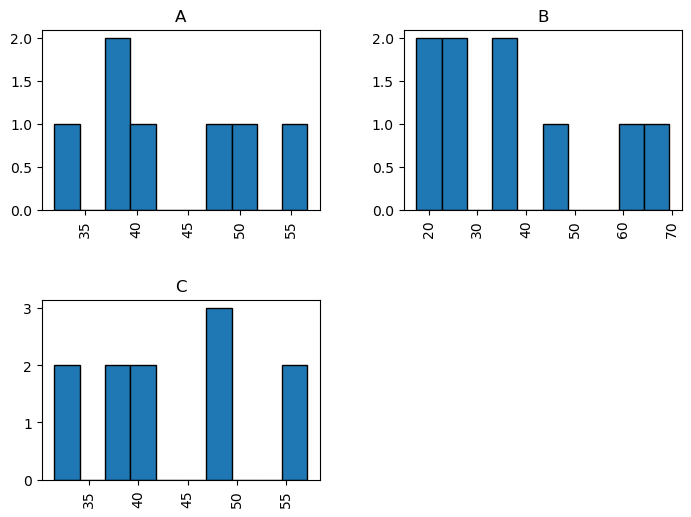

In [81]:
#Create historgrams by Group A,B,C
df2_jsclean['Duration'].hist(by=df2_jsclean['Group'], edgecolor='black',figsize=(8,6))

In [82]:
#summary of jigsaw puzzle solving time in each group
rp.summary_cont(df2_jsclean['Duration'])
rp.summary_cont(df2_jsclean['Duration'].groupby(df2_jsclean['Group']))

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
A,7,43.4600,8.1815,3.0923,35.8933,51.0267
B,9,37.2800,18.2928,6.0976,23.2189,51.3411
C,11,43.5309,8.6344,2.6034,37.7302,49.3316


In [83]:
stats.f_oneway(df2_jsclean['Duration'][df2_jsclean['Group'] == 'A'],
               df2_jsclean['Duration'][df2_jsclean['Group'] == 'B'],
               df2_jsclean['Duration'][df2_jsclean['Group'] == 'C'])

F_onewayResult(statistic=0.7292608358194926, pvalue=0.4926479998380359)

In [84]:
correlations_js = df2_jsclean[["Duration", "StrategicOptions","ObservationMode","Complete","Tipscheck"]].corr()
correlations_js

,Duration,StrategicOptions,ObservationMode,Complete,Tipscheck
Duration,1.000000,0.322318,0.015726,-0.003822,0.481031
StrategicOptions,0.322318,1.000000,0.231455,0.554700,0.350000
ObservationMode,0.015726,0.231455,1.000000,0.128388,0.046291
Complete,-0.003822,0.554700,0.128388,1.000000,-0.055470
Tipscheck,0.481031,0.350000,0.046291,-0.055470,1.000000


In [63]:
#regression 
x = df2_jsclean[['ObservationMode', 'StrategicOptions','Complete','Tipscheck']]
y = df2_jsclean['Duration']
x = sm.add_constant(x)
reg1 = sm.OLS(y, x).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.414
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.264
Time:                        21:09:02   Log-Likelihood:                -103.69
No. Observations:                  27   AIC:                             215.4
Df Residuals:                      23   BIC:                             220.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               40.7461     14.451  

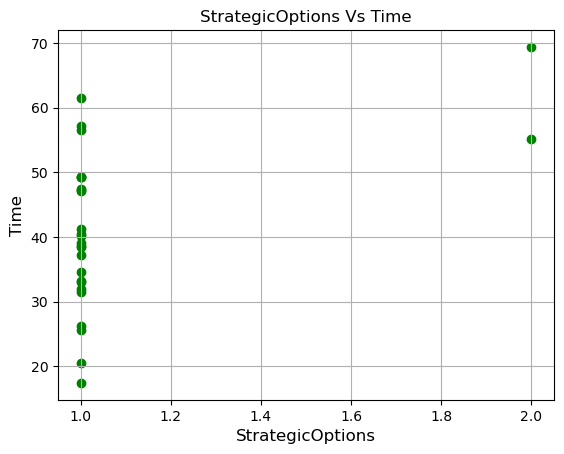

In [54]:
plt.scatter(df2_jsclean['Tipscheck'], df2_jsclean['Duration'], color='green')
plt.title('StrategicOptions Vs Time', fontsize=12)
plt.xlabel('StrategicOptions', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.grid(True)
plt.show()

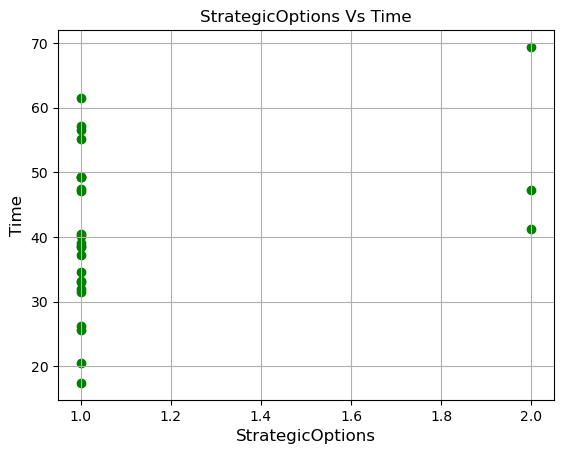

In [53]:
plt.scatter(df2_jsclean['StrategicOptions'], df2_jsclean['Duration'], color='green')
plt.title('StrategicOptions Vs Time', fontsize=12)
plt.xlabel('StrategicOptions', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.grid(True)
plt.show()

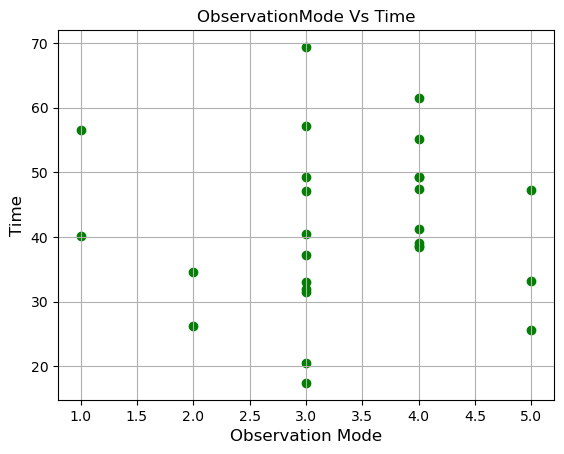

In [55]:
plt.scatter(df2_jsclean['ObservationMode'], df2_jsclean['Duration'], color='green')
plt.title('ObservationMode Vs Time', fontsize=12)
plt.xlabel('Observation Mode', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.grid(True)
plt.show()

In [85]:
df3_CT = pd.read_csv('/Users/shanshanma/Desktop/CTObservation_Python/CT_Performance.csv')
df3_CT.info()
df3_CT.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       34 non-null     object 
 1   Part1_Sum  29 non-null     float64
 2   Part2_Sum  29 non-null     float64
 3   Part3_Sum  29 non-null     float64
 4   Part4_Sum  29 non-null     float64
 5   All_Sum    27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.6+ KB


,Code,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
0,CNH001,13.0,13.5,12.5,5.5,44.5
1,CNH002,12.5,10.5,8.0,2.5,33.5
2,CNH004,3.5,7.5,-1.0,-0.5,9.5
3,CNH005,NaN,NaN,NaN,NaN,NaN
4,CNH006,8.0,0.0,6.5,7.0,21.5


In [86]:
df3_CTclean = df3_CT.dropna(axis=0, how='any')
df3_CTclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 32
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Code       27 non-null     object 
 1   Part1_Sum  27 non-null     float64
 2   Part2_Sum  27 non-null     float64
 3   Part3_Sum  27 non-null     float64
 4   Part4_Sum  27 non-null     float64
 5   All_Sum    27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


In [87]:
#descriptive statistics
df3_CTclean.describe()

,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,9.407407,7.666667,6.962963,2.888889,26.925926
std,4.626506,5.586729,4.443937,2.301059,11.090280
min,0.500000,-1.500000,-4.000000,-2.000000,6.500000
25%,5.750000,2.250000,5.000000,1.000000,20.750000
50%,9.500000,7.500000,8.000000,2.500000,27.500000
75%,12.750000,12.000000,9.500000,4.750000,35.750000
max,17.000000,18.000000,14.000000,7.000000,45.500000


In [88]:
#select numeric data only
numeric_df3CT = df3_CTclean.select_dtypes(include='number')

#Perform correlation analysis - correlation coefficient only
correlation_df3CT = numeric_df3CT.corr()
print(correlation_df3CT)

           Part1_Sum  Part2_Sum  Part3_Sum  Part4_Sum   All_Sum
Part1_Sum   1.000000   0.359983   0.242083  -0.031712  0.688933
Part2_Sum   0.359983   1.000000   0.131551   0.216910  0.751642
Part3_Sum   0.242083   0.131551   1.000000   0.260988  0.622115
Part4_Sum  -0.031712   0.216910   0.260988   1.000000  0.408103
All_Sum     0.688933   0.751642   0.622115   0.408103  1.000000


In [89]:
#check correlation coefficient and significance among variables in df3
for col1 in numeric_df3CT.columns:
    for col2 in numeric_df3CT.columns:
        if col1 != col2:
            correlation_coefficient, p_value = stats.pearsonr(numeric_df3CT[col1], numeric_df3CT[col2])
            print(f"Correlation coefficient between {col1} and {col2}: {correlation_coefficient}")
            print(f"P-value: {p_value}\n")

Correlation coefficient between Part1_Sum and Part2_Sum: 0.3599827725506184
P-value: 0.06512457372269606

Correlation coefficient between Part1_Sum and Part3_Sum: 0.242083263287725
P-value: 0.22376561830619393

Correlation coefficient between Part1_Sum and Part4_Sum: -0.031712492185365156
P-value: 0.8752253179997254

Correlation coefficient between Part1_Sum and All_Sum: 0.6889332724688129
P-value: 7.077980730231982e-05

Correlation coefficient between Part2_Sum and Part1_Sum: 0.3599827725506184
P-value: 0.06512457372269606

Correlation coefficient between Part2_Sum and Part3_Sum: 0.1315509881279548
P-value: 0.5130694542596744

Correlation coefficient between Part2_Sum and Part4_Sum: 0.21690988596034305
P-value: 0.27713941574849843

Correlation coefficient between Part2_Sum and All_Sum: 0.7516418210940533
P-value: 6.201610046234176e-06

Correlation coefficient between Part3_Sum and Part1_Sum: 0.242083263287725
P-value: 0.22376561830619393

Correlation coefficient between Part3_Sum and 

In [90]:
#merge data sets df1 and df2
merged_acajs = pd.merge(df1_acaclean, 
                        df2_jsclean,
                       how = "inner",
                       on="Code")
merged_acajs

NameError: name 'df1_acaclean' is not defined

In [78]:
#select numeric data only
numeric_merged_acajs = merged_acajs.select_dtypes(include='number')
numeric_merged_acajs.head(5)

,Gender,CN9,MTH9,Eng9,CN10,MTH10,Eng10,Group,Duration,StrategicOptions,ObservationMode,Complete,Correct,Tipscheck
0,1.0,69.0,59.0,95.0,78.0,39.0,86.0,1.0,56.56,1.0,1.0,1.0,1.0,1.0
1,2.0,52.0,41.0,85.5,71.0,38.0,72.5,1.0,38.58,1.0,4.0,1.0,1.0,1.0
2,2.0,59.0,72.0,71.0,76.0,60.0,52.5,1.0,49.33,1.0,4.0,1.0,1.0,1.0
3,2.0,64.0,64.0,90.0,78.0,68.0,74.5,2.0,25.62,1.0,5.0,1.0,1.0,1.0
4,2.0,49.0,82.0,106.5,79.0,70.0,98.0,1.0,41.19,2.0,4.0,2.0,2.0,1.0


In [79]:
#Perform correlation analysis within the merged data set numeric_merged_acajs
correlation_merged_acajs = numeric_merged_acajs.corr()
print(correlation_merged_acajs)

                    Gender       CN9      MTH9      Eng9      CN10     MTH10  \
Gender            1.000000  0.051640  0.193402 -0.270914 -0.188029  0.329423   
CN9               0.051640  1.000000  0.323073 -0.064345  0.282854  0.288367   
MTH9              0.193402  0.323073  1.000000 -0.003499  0.122195  0.668474   
Eng9             -0.270914 -0.064345 -0.003499  1.000000  0.435752 -0.148776   
CN10             -0.188029  0.282854  0.122195  0.435752  1.000000 -0.265190   
MTH10             0.329423  0.288367  0.668474 -0.148776 -0.265190  1.000000   
Eng10            -0.039041  0.237312  0.163321  0.742104  0.291118  0.179864   
Group             0.076944  0.113846  0.385301 -0.000079  0.134046  0.123069   
Duration          0.192446 -0.012764  0.191481  0.134278  0.226696 -0.014561   
StrategicOptions  0.147442 -0.303474 -0.012502  0.302184  0.197307  0.052995   
ObservationMode   0.443640 -0.228455 -0.203886  0.066987 -0.171532  0.111865   
Complete          0.081786 -0.158403  0.

In [94]:
#merge data sets df1 and df3
merged_acact = pd.merge(df1_acaclean, 
                        df3_CTclean,
                       how = "inner",
                       on="Code")
merged_acact

,Code,Gender,CN9,MTH9,Eng9,CN10,MTH10,Eng10,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
0,CNH001,1.0,69.0,59.0,95.0,78.0,39.0,86.0,13.0,13.5,12.5,5.5,44.5
1,CNH002,2.0,52.0,41.0,85.5,71.0,38.0,72.5,12.5,10.5,8.0,2.5,33.5
2,CNH004,2.0,59.0,72.0,71.0,76.0,60.0,52.5,3.5,7.5,-1.0,-0.5,9.5
3,CNH006,2.0,64.0,64.0,90.0,78.0,68.0,74.5,8.0,0.0,6.5,7.0,21.5
4,CNH008,2.0,49.0,82.0,106.5,79.0,70.0,98.0,0.5,-1.5,8.0,1.0,8.0
5,CNH011,2.0,61.0,76.0,67.5,75.0,64.0,57.0,14.0,9.0,11.0,-2.0,32.0
6,CNH012,2.0,47.0,86.0,75.5,84.0,71.0,55.0,9.5,0.0,-4.0,1.0,6.5
7,CNH014,1.0,55.0,66.0,79.5,76.0,57.0,58.5,8.0,12.0,-1.0,2.5,21.5
8,CNH015,2.0,27.0,66.0,73.0,65.0,81.0,59.5,9.5,15.0,5.0,5.5,35.0
9,CNH017,2.0,88.0,92.0,84.0,73.0,114.0,87.0,12.5,18.0,9.5,5.5,45.5


In [95]:
#select numeric data only - merged_acact
numeric_merged_acact = merged_acact.select_dtypes(include='number')
numeric_merged_acact.head(5)

,Gender,CN9,MTH9,Eng9,CN10,MTH10,Eng10,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
0,1.0,69.0,59.0,95.0,78.0,39.0,86.0,13.0,13.5,12.5,5.5,44.5
1,2.0,52.0,41.0,85.5,71.0,38.0,72.5,12.5,10.5,8.0,2.5,33.5
2,2.0,59.0,72.0,71.0,76.0,60.0,52.5,3.5,7.5,-1.0,-0.5,9.5
3,2.0,64.0,64.0,90.0,78.0,68.0,74.5,8.0,0.0,6.5,7.0,21.5
4,2.0,49.0,82.0,106.5,79.0,70.0,98.0,0.5,-1.5,8.0,1.0,8.0


In [105]:
#Perform correlation analysis within the merged data set merged_acact
correlation_merged_acact = numeric_merged_acact.corr()
print(correlation_merged_acact)

             Gender       CN9      MTH9      Eng9      CN10     MTH10  \
Gender     1.000000  0.051640  0.193402 -0.270914 -0.188029  0.329423   
CN9        0.051640  1.000000  0.323073 -0.064345  0.282854  0.288367   
MTH9       0.193402  0.323073  1.000000 -0.003499  0.122195  0.668474   
Eng9      -0.270914 -0.064345 -0.003499  1.000000  0.435752 -0.148776   
CN10      -0.188029  0.282854  0.122195  0.435752  1.000000 -0.265190   
MTH10      0.329423  0.288367  0.668474 -0.148776 -0.265190  1.000000   
Eng10     -0.039041  0.237312  0.163321  0.742104  0.291118  0.179864   
Part1_Sum  0.048905  0.208636  0.029079 -0.183469 -0.142798  0.074493   
Part2_Sum  0.041204  0.300389  0.003390 -0.103883 -0.333109  0.377488   
Part3_Sum -0.027449  0.120441 -0.019139  0.347530 -0.017485  0.049216   
Part4_Sum  0.071822 -0.049369 -0.109684  0.277816 -0.221863  0.155037   
All_Sum    0.045061  0.276376 -0.016588  0.068031 -0.280414  0.273124   

              Eng10  Part1_Sum  Part2_Sum  Part3_S

In [117]:
#regression 2
x = numeric_merged_acact[['CN9','MTH9', 'Eng9','CN10','MTH10','Eng10']]
y = numeric_merged_acact['Part1_Sum']
x = sm.add_constant(x)
reg2 = sm.OLS(y, x).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:              Part4_Sum   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.745
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.162
Time:                        21:47:55   Log-Likelihood:                -54.619
No. Observations:                  27   AIC:                             123.2
Df Residuals:                      20   BIC:                             132.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3364      6.866      1.068      0.2

In [118]:
#regression 3
x = numeric_merged_acact[['CN9','MTH9', 'Eng9','CN10','MTH10','Eng10']]
y = numeric_merged_acact['Part2_Sum']
x = sm.add_constant(x)
reg3 = sm.OLS(y, x).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:              Part2_Sum   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2.108
Date:                Sun, 25 Jun 2023   Prob (F-statistic):             0.0977
Time:                        21:48:33   Log-Likelihood:                -77.636
No. Observations:                  27   AIC:                             169.3
Df Residuals:                      20   BIC:                             178.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6260     16.105      1.281      0.2

In [119]:
#regression 4
x = numeric_merged_acact[['CN9','MTH9', 'Eng9','CN10','MTH10','Eng10']]
y = numeric_merged_acact['Part3_Sum']
x = sm.add_constant(x)
reg4 = sm.OLS(y, x).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:              Part3_Sum   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.056
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.420
Time:                        21:48:56   Log-Likelihood:                -74.358
No. Observations:                  27   AIC:                             162.7
Df Residuals:                      20   BIC:                             171.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1798     14.264      0.503      0.6

In [120]:
#regression 5
x = numeric_merged_acact[['CN9','MTH9', 'Eng9','CN10','MTH10','Eng10']]
y = numeric_merged_acact['Part4_Sum']
x = sm.add_constant(x)
reg5 = sm.OLS(y, x).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:              Part4_Sum   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     1.745
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.162
Time:                        21:49:18   Log-Likelihood:                -54.619
No. Observations:                  27   AIC:                             123.2
Df Residuals:                      20   BIC:                             132.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3364      6.866      1.068      0.2

In [ ]:
#regression 6
x = numeric_merged_acact[['CN9','MTH9', 'Eng9','CN10','MTH10','Eng10']]
y = numeric_merged_acact['All_Sum']
x = sm.add_constant(x)
reg6 = sm.OLS(y, x).fit()
print(reg6.summary())

In [101]:
#merge data sets df2 and df3
merged_jsct = pd.merge(df2_jsclean, 
                        df3_CTclean,
                       how = "inner",
                       on="Code")
merged_jsct

,Code,Group,Duration,StrategicOptions,StrategyicOperation,ObservationMode,ObservationStrategy,Complete,Correct,Tipscheck,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
0,CNH001,1.0,56.56,1.0,Yes,1.0,Not at all,1.0,1.0,1.0,13.0,13.5,12.5,5.5,44.5
1,CNH002,1.0,38.58,1.0,Yes,4.0,Frequently,1.0,1.0,1.0,12.5,10.5,8.0,2.5,33.5
2,CNH004,1.0,49.33,1.0,Yes,4.0,Frequently,1.0,1.0,1.0,3.5,7.5,-1.0,-0.5,9.5
3,CNH006,2.0,25.62,1.0,Yes,5.0,All the time,1.0,1.0,1.0,8.0,0.0,6.5,7.0,21.5
4,CNH008,1.0,41.19,2.0,No,4.0,Frequently,2.0,2.0,1.0,0.5,-1.5,8.0,1.0,8.0
5,CNH011,2.0,26.18,1.0,Yes,2.0,Barely,1.0,1.0,1.0,14.0,9.0,11.0,-2.0,32.0
6,CNH012,2.0,69.39,2.0,No,3.0,Occasionally,1.0,1.0,2.0,9.5,0.0,-4.0,1.0,6.5
7,CNH014,2.0,34.58,1.0,Yes,2.0,Barely,1.0,1.0,1.0,8.0,12.0,-1.0,2.5,21.5
8,CNH015,2.0,33.18,1.0,Yes,5.0,All the time,1.0,1.0,1.0,9.5,15.0,5.0,5.5,35.0
9,CNH017,2.0,47.11,1.0,Yes,3.0,Occasionally,1.0,1.0,1.0,12.5,18.0,9.5,5.5,45.5


In [102]:
#select numeric data only - merged_jsct
numeric_merged_jsct = merged_jsct.select_dtypes(include='number')
numeric_merged_jsct.head(5)

,Group,Duration,StrategicOptions,ObservationMode,Complete,Correct,Tipscheck,Part1_Sum,Part2_Sum,Part3_Sum,Part4_Sum,All_Sum
0,1.0,56.56,1.0,1.0,1.0,1.0,1.0,13.0,13.5,12.5,5.5,44.5
1,1.0,38.58,1.0,4.0,1.0,1.0,1.0,12.5,10.5,8.0,2.5,33.5
2,1.0,49.33,1.0,4.0,1.0,1.0,1.0,3.5,7.5,-1.0,-0.5,9.5
3,2.0,25.62,1.0,5.0,1.0,1.0,1.0,8.0,0.0,6.5,7.0,21.5
4,1.0,41.19,2.0,4.0,2.0,2.0,1.0,0.5,-1.5,8.0,1.0,8.0


In [104]:
#Perform correlation analysis within the merged data set merged_jsct
correlation_merged_jsct = numeric_merged_jsct.corr()
print(correlation_merged_jsct)

                     Group  Duration  StrategicOptions  ObservationMode  \
Group             1.000000  0.033509         -0.065233        -0.060394   
Duration          0.033509  1.000000          0.322318         0.015726   
StrategicOptions -0.065233  0.322318          1.000000         0.231455   
ObservationMode  -0.060394  0.015726          0.231455         1.000000   
Complete         -0.280431 -0.003822          0.554700         0.128388   
Correct          -0.280431 -0.003822          0.554700         0.128388   
Tipscheck         0.123942  0.481031          0.350000         0.046291   
Part1_Sum         0.440642  0.012041         -0.265351        -0.301744   
Part2_Sum        -0.030850  0.097326         -0.236463        -0.029853   
Part3_Sum         0.096764  0.035811         -0.199683        -0.022240   
Part4_Sum        -0.001135  0.153248         -0.060890         0.257707   
All_Sum           0.206819  0.100198         -0.322462        -0.096358   

                  Comple

In [110]:
#regression 7
x = numeric_merged_jsct[['Duration','ObservationMode', 'StrategicOptions','Complete','Tipscheck']]
y = numeric_merged_jsct['All_Sum']
x = sm.add_constant(x)
reg7 = sm.OLS(y, x).fit()
print(reg7.summary())

                            OLS Regression Results                            
Dep. Variable:                All_Sum   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9362
Date:                Sun, 25 Jun 2023   Prob (F-statistic):              0.461
Time:                        21:44:16   Log-Likelihood:                -100.64
No. Observations:                  27   AIC:                             211.3
Df Residuals:                      22   BIC:                             217.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.7808     16.696  